# Getting Data

In [1]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.metrics import accuracy_score

In [4]:
df= pd.read_csv('loan.csv')

In [5]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


As we can see in the output.

There are 614 entries
There are total 13 features (0 to 12)
There are three types of datatype dtypes: float64(4), int64(1), object(8)
It's Memory usage that is, memory usage: 62.5+ KB
Also, We can check how many missing values available in the Non-Null Count column

# Exploratory Data Analysis

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt     
from scipy import stats

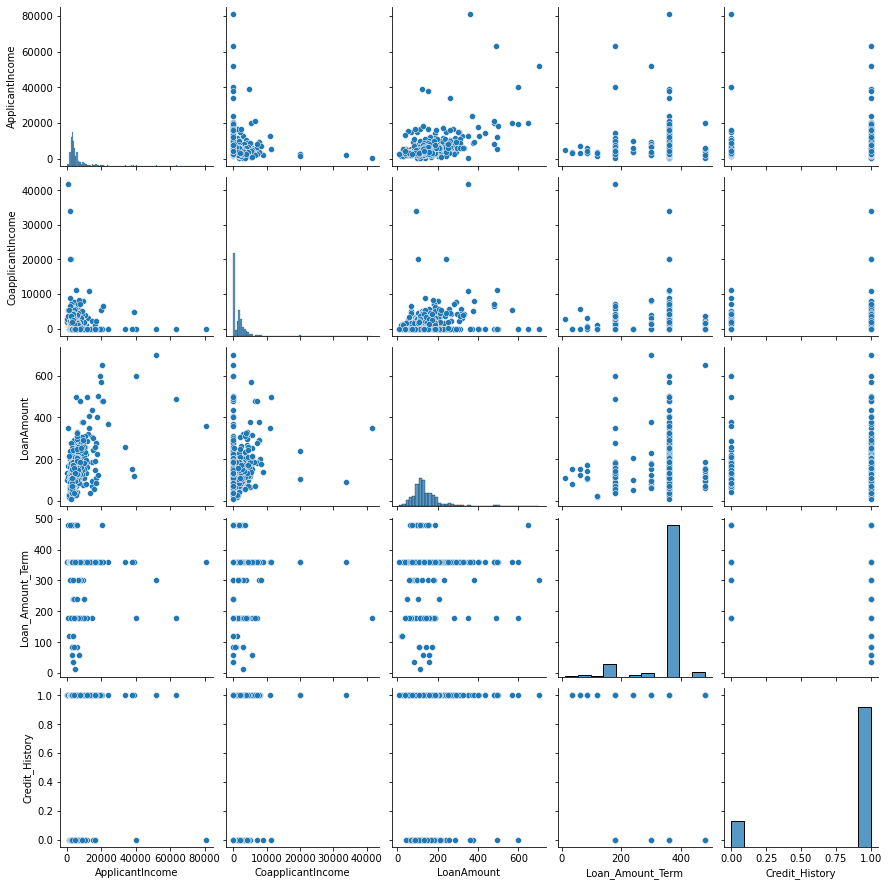

In [9]:
sns.pairplot(df)

Pairplot gives us a general feel of how the data are related to each other.

# Univariate Analysis

<AxesSubplot:>

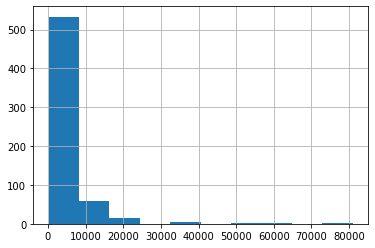

In [10]:
df['ApplicantIncome'].hist()

<AxesSubplot:>

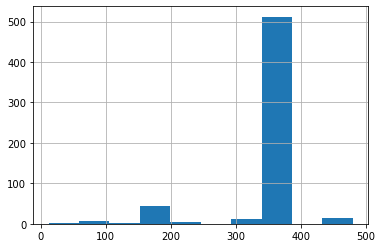

In [16]:
df['Loan_Amount_Term'].hist()

<AxesSubplot:>

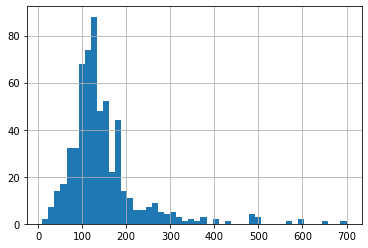

In [11]:
df['LoanAmount'].hist(bins=50)

<AxesSubplot:>

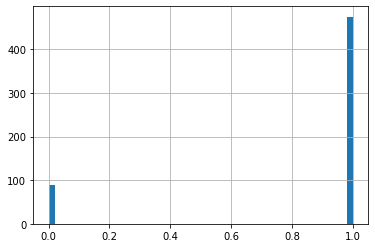

In [19]:
df['Credit_History'].hist(bins=50)

EDA for categorical variable

In [12]:
loan_approval = df['Loan_Status'].value_counts()['Y']
print("Total number of loans approved: ", loan_approval)

Total number of loans approved:  422


In [13]:
# Credit History and Loan Status
pd.crosstab(df['Credit_History'], df['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


<AxesSubplot:>

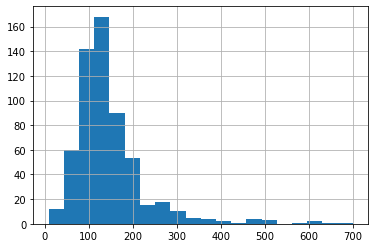

In [14]:
# Add both ApplicantIncome and CoapplicantIncome to TotalIncome
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Looking at the distribtion of TotalIncome
df['LoanAmount'].hist(bins=20)

<AxesSubplot:>

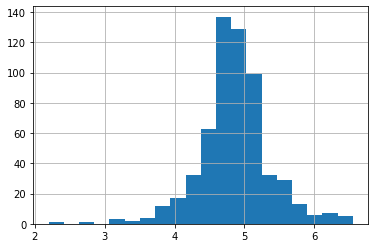

In [15]:
# Perform log transformation of TotalIncome to make it closer to normal
df['LoanAmount_log'] = np.log(df['LoanAmount'])

# Looking at the distribtion of TotalIncome_log
df['LoanAmount_log'].hist(bins=20)

<AxesSubplot:>

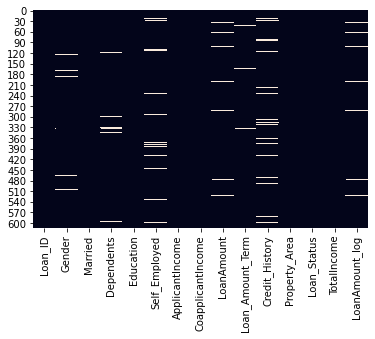

In [197]:
#Visualizing the null values; the white bars represent the null values of each column
sns.heatmap(df.isnull(), cbar=False)

As we can see here, there are too many columns missing with small amount of null values so we use mean amd mode to replace with NaN values.

In [17]:
df['Credit_History'].fillna(df['Credit_History'].mode(), inplace=True) # Mode


df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True) # Mean

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True) # Mean

Convert Categorical variable with Numerical values.

In [21]:
df.Gender = df.Gender.replace({"Male": 1, "Female" : 0})

df.Married = df.Married.replace({"Yes": 1, "No" : 0})

df.Self_Employed = df.Self_Employed.replace({"Yes": 1, "No" : 0})

In [22]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

df['Married'].fillna(df['Married'].mode()[0], inplace=True)

df['Credit_History'].fillna(df['Credit_History'].median(), inplace=True)

df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

In [23]:
#Property_Area, Dependents and Education has multiple values so now we can use LabelEncoder from sklearn package

from sklearn.preprocessing import LabelEncoder
feature_col = ['Property_Area','Education', 'Dependents']
le = LabelEncoder()
for col in feature_col:
    df[col] = le.fit_transform(df[col])

In [24]:
corr_matrix= df.corr()
corr_matrix

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,LoanAmount_log
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106904,-0.074030,0.009170,-0.025752,0.093191,0.145548
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.010938,0.004257,0.083319,0.183005
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163103,-0.103864,-0.040160,-0.000244,0.125590,0.159614
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,-0.065243,-0.161362,-0.149400
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.001550,-0.030860,0.113000,0.111737
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.009500,0.893037,0.439463
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.010522,0.342781,0.207122
LoanAmount,0.106904,0.146546,0.163103,-0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.046632,0.620316,0.896371
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.076120,-0.070917,0.086511
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.001963,-0.012563,-0.019005


<AxesSubplot:>

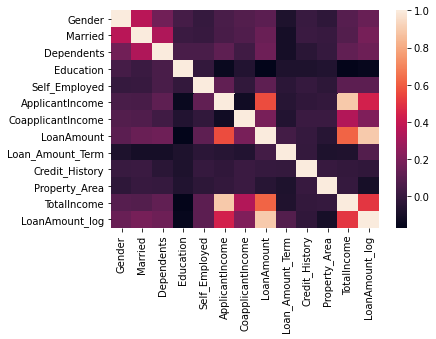

In [25]:
sns.heatmap(df.corr(), annot=False)

In [26]:
correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)
correlated_features

{'LoanAmount_log', 'TotalIncome'}

In [27]:
df= df.drop(['LoanAmount_log','TotalIncome'] , axis=1)

#As we can see above both the columns {'LoanAmount_log', 'TotalIncome'} have correlation > 80%, we can safetly drop them.

In [28]:
#Splitting dataset to test_train 
array = df.values
X = array[:,6:11]
Y = array[:,12]
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=7)

### Evaluation method :
* As this is a classification problem we will try to get the confusion matrix and get more insights for our models.

In [29]:
from sklearn import metrics 
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve,accuracy_score,precision_score, recall_score

In [30]:
def classification_metrics(x,y) :
    cm= metrics.confusion_matrix(x,y)
    
    sns.heatmap(cm,annot=True,cmap='Blues',fmt='g')
    plt.title('Confusion Matrix',fontsize=16)

# Model and Evaluation

### Model used

1. Logistic Regression
2. K-Nearest Neighbor
3. Decision Tree

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors

In [32]:
model = LogisticRegression()
model.fit(x_train,y_train)
predictionsLr = model.predict(x_test)
print("Logistic Model accuracy score = ",accuracy_score(y_test, predictionsLr))

Logistic Model accuracy score =  0.8292682926829268


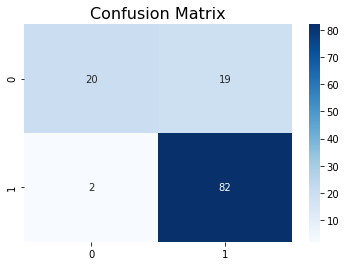

In [33]:
classification_metrics(y_test, predictionsLr)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knnModel = KNeighborsClassifier(n_neighbors=18)
knnModel.fit(x_train,y_train)
predictionsKnn = knnModel.predict(x_test)
    
print("KNN model accuracy Score = ",accuracy_score(y_test, predictionsKnn))

KNN model accuracy Score =  0.7073170731707317


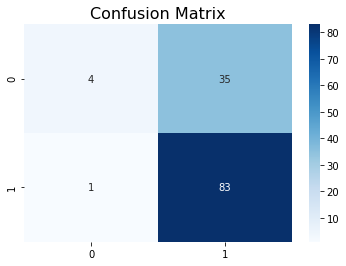

In [35]:
classification_metrics(y_test, predictionsKnn)

In [36]:
from sklearn.tree import DecisionTreeClassifier
    
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(x_train,y_train)
predictionsDt = dt.predict(x_test)
print("Decision tree model accuracy Score = ",accuracy_score(y_test, predictionsDt))

Decision tree model accuracy Score =  0.8292682926829268


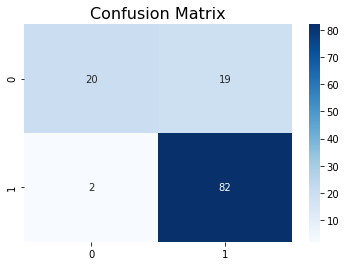

In [37]:
classification_metrics(y_test, predictionsDt)

## We can see that LR and Decision Tree model has the maximum accuracy, hence we can use them for classification. 

### Furthermore, we can check other metrics like F1 score, AUC ROC, Precision, Recall values to get more clarification.
### Apart from that we can also perform hyperparameter tuning to further improve our model.